# Example Notebook for Checkpoint Plots
A collection of functions to facilitate the comparison of intermediate data products across different reduction and analysss pipelines.

In [2]:
from sys import path
# Add the highest level of the jwst-mtl repo to path
soss_path = '/home/radica/GitHub/jwst-mtl/'
path.insert(1, soss_path)

from astropy.io import fits
import matplotlib.pyplot as plt

# Useful tool from the DMS for creating a trace mask
from jwst.extract_1d.soss_extract import soss_syscor

# Import the checkpoint_plots code
import SOSS.checkpoint_plots.checkpoint_plots as checkpoints

#### Make a plot to assess the quality of the order decontamination performed by ATOCA.

In [5]:
# Path to the SOSS observation fits file. Ideally, whatever was passed to ATOCA via the
# Extract1dStep of the JWST DMS
observation_filepath = '/home/radica/jwst/ers/data_challenge/WASP-52b/pipeline_outputs_directory/CLEAR/fiducial/IDTSOSS_clear_noisy_1_backgroundsub.fits'
# Path to the decontaminated SOSS orders constructed by ATOCA. These will generally have
# the suffix '_SossExtractModel.fits'.
# ** Note **: the soss_modelname argument must be specified when calling Extract1dStep to
# produce this files.
soss_model_filepath = '/home/radica/jwst/ers/data_challenge/WASP-52b/pipeline_outputs_directory/CLEAR/fiducial/IDTSOSS_clear_noisy_SossExtractModel.fits'

In [6]:
# Initialize the DecontaminationPlot
dp = checkpoints.DecontaminationPlot(observation_filepath, soss_model_filepath)

2022-04-05 14:46:31,736 - stpipe - WARNING - /home/radica/.anaconda3/envs/atoca_devel/lib/python3.8/site-packages/asdf/schema.py:305: AsdfWarning: Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'
  warnings.warn(msg.format(tag, schema_uri), AsdfWarning)



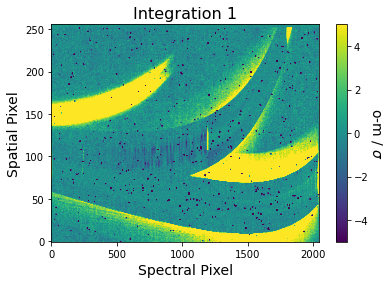

In [7]:
# Make the plot
dp.make_decontamination_plot()
# By default a plot is made for the first integration of the TSO. This can be changed by
# passing a list of integrations to the 'integrations' argument. Alternative, pass 'all' to
# plot the deconamination for every integration.
# To output the plots to a pdf file, specify a file name using the 'savefile' argument - useful
# if comparing many integrations.

#### Make a plot to assess the quality of background subtraction

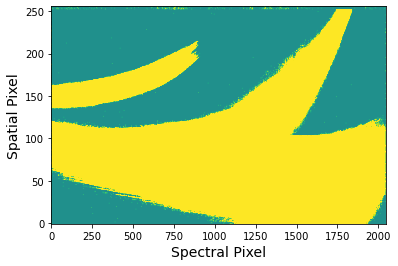

In [17]:
# In order to assess the quality of a background subtraction, we need to mask as much of the
# trace as possible. Here I create a mask to do this using a deep stack of the entire TSO.
# Open the deep stack.
df = fits.open('/home/radica/jwst/ers/data_challenge/WASP-52b/pipeline_outputs_directory/CLEAR/IDTSOSS_clear_noisy_0_rampfitstep.fits')
# Create the trace mask.
bkg_mask = soss_syscor.make_background_mask(df[1].data, width=65)

# Show the trace mask.
plt.imshow(bkg_mask, origin='lower', aspect='auto', vmin=-0.5, vmax=0.5)

plt.xlabel('Spectral Pixel', fontsize=14)
plt.ylabel('Spatial Pixel', fontsize=14)
plt.show()
# So all three orders are sufficiently masked.

In [19]:
# Path to background subtracted TSO datacube.
observation_filepath = '/home/radica/jwst/ers/data_challenge/WASP-52b/pipeline_outputs_directory/CLEAR/fiducial/IDTSOSS_clear_noisy_1_backgroundsub.fits'
# Initialize the BackgroundSubPlot.
bp = checkpoints.BackgroundSubPlot(observation_filepath)

2022-04-06 09:18:59,376 - stpipe - WARNING - /home/radica/.anaconda3/envs/atoca_devel/lib/python3.8/site-packages/asdf/schema.py:305: AsdfWarning: Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'
  warnings.warn(msg.format(tag, schema_uri), AsdfWarning)



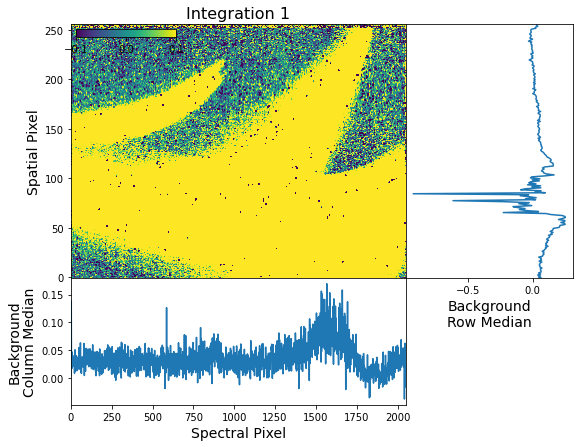

In [20]:
# Make the plot - the background subtracted data frame is shown in the center panel, and the
# median counts of each row (column), after masking the trace are shown on the right (bottom).
bp.make_backgroundsub_plot(bkg_mask, cbar_lims=[-0.1, 0.1])
# By default a plot is made for the first integration of the TSO. This can be changed by
# passing a list of integrations to the 'integrations' argument. Alternative, pass 'all' to
# plot the deconamination for every integration.
# To output the plots to a pdf file, specify a file name using the 'savefile' argument - useful
# if comparing many integrations.